## (1) Data Description

The `players.csv` file contains a list of **196 unique users** and **7 features** describing each user.  
Those features include:
 
- `name` *(chr)* - Player's name.
  
- `Age` *(int)* - The player’s age in years, ranging from **9 to 58 years old**, with **median** age around 19.

- `gender` *(chr)* - The player’s gender, contains multiple categories to represent diverse gender identities.

- `experience` *(chr)* - Indicates a player's experience level. Possible levels include:  
  `Beginner`, `Amateur`, `Regular`, `Pro`, and `Veteran`.

- `played_hours` *(dbl)* - Total hours the player has played. **Hours range from** 0 to 223.1, with a **mean** of 5.85 and a **median** of 0.1.

- `subscribe` *(int)* - Indicates whether the player subscribed to a game-related newsletter (`TRUE` or `FALSE`). Out of 196 players, **144 (≈73.5%) subscribed**, and **52 (≈26.5%) did not**.

- `hashedEmail` *(chr)* - Player’s email stored as a hashed value for privacy.


## (2) Questions

The broad question posed is: "We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts." **To answer this broad question**, the specific question formulated is: Do `gender`, `experience`, and subscribe status (`subscribe`) significantly predict whether a player is among the top 20% of players in terms of total hours spent playing the game (`played_hours`) in `players.csv`, and if so, which player characteristics are most associated with higher engagement?

Since our response variable indicates whether a player is among the **top 20%** of players by total hours played, we first compute the **80th percentile** of `played_hours`, then use `mutate()` on the `players` dataset to create a new binary variable `top_hours` which is our response variable for a potential KNN regression. 


 


## (3) Exploratory Data Analysis and Visualization

### Data Wrangling

In [39]:
library(tidyverse)
options(repr.matrix.max.rows = 10)
options(repr.matrix.max.columns = 10)

# (1) Any rows containing missing values need to be removed to ensure the dataset is clean
players_0 <- read.csv("data/players.csv") |> drop_na()

# (2) Selecting Relevant Variables 
players_0 <- players_0 |> select(experience, Age, gender, subscribe, played_hours)

# (3) Creating new response variable top_hours
top20Hour <- quantile(players$played_hours, 0.8, na.rm = TRUE)
players_0 <- players_0 |> mutate(top_hours = played_hours >= top20Hour)

### Mean Calculation

In [48]:
players <- read.csv("data/players.csv") 

# (1) Selecting quantitative variables
players_quant <- players |> select(Age, played_hours) |> drop_na()

# (2) Calculate mean_age and mean_played_hours
players_quant = players_quant |> summarise(mean_age = mean(Age), mean_played_hours = mean(played_hours))
players_quant

mean_age,mean_played_hours
<dbl>,<dbl>
21.13918,5.904639


### Visualization

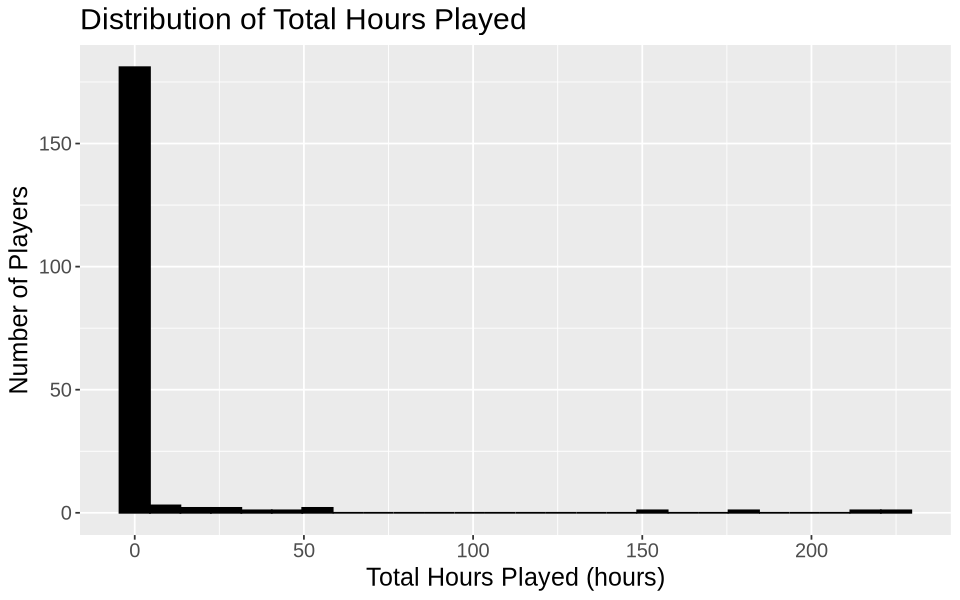

In [76]:
options(repr.plot.width = 8, repr.plot.height = 5) 
players |> ggplot(aes(x = played_hours)) +
  geom_histogram(binwidth = 9, fill = "black", color = "black") +
  labs(title = "Distribution of Total Hours Played",
    x = "Total Hours Played (hours)",
    y = "Number of Players") + theme(text = element_text(size = 15))

The right-skewed distribution shows that the majority of players spent under an hour, while a small, highly engaged group played much longer. Therefore, using the 80th percentile of hours played is an appropriate threshold for defining "avid players".

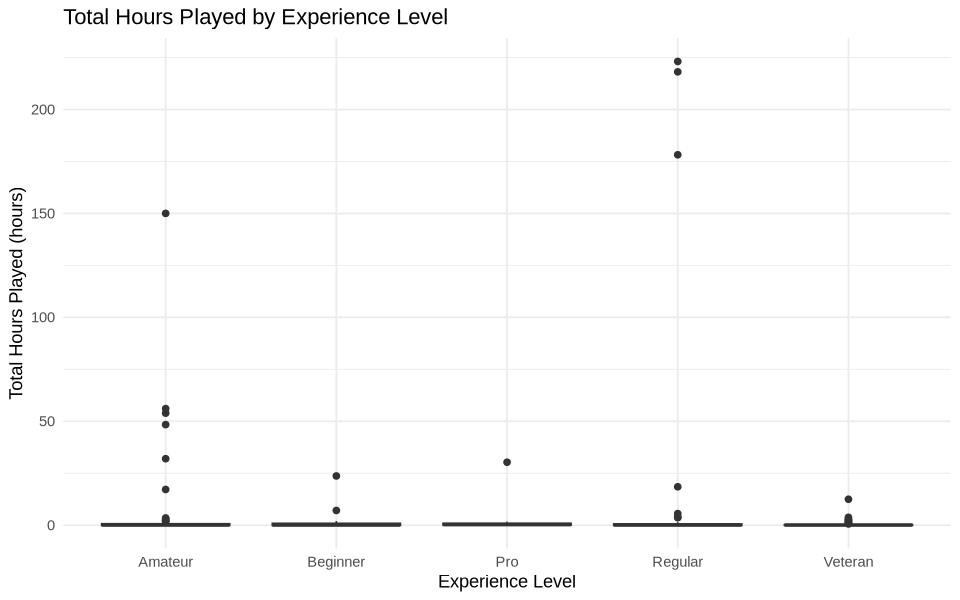

In [77]:
players |>
  ggplot(aes(x = experience, y = played_hours, fill = experience)) +
  geom_boxplot() +
  labs(title = "Total Hours Played by Experience Level",
    x = "Experience Level",
    y = "Total Hours Played (hours)") + theme(text = element_text(size = 15))

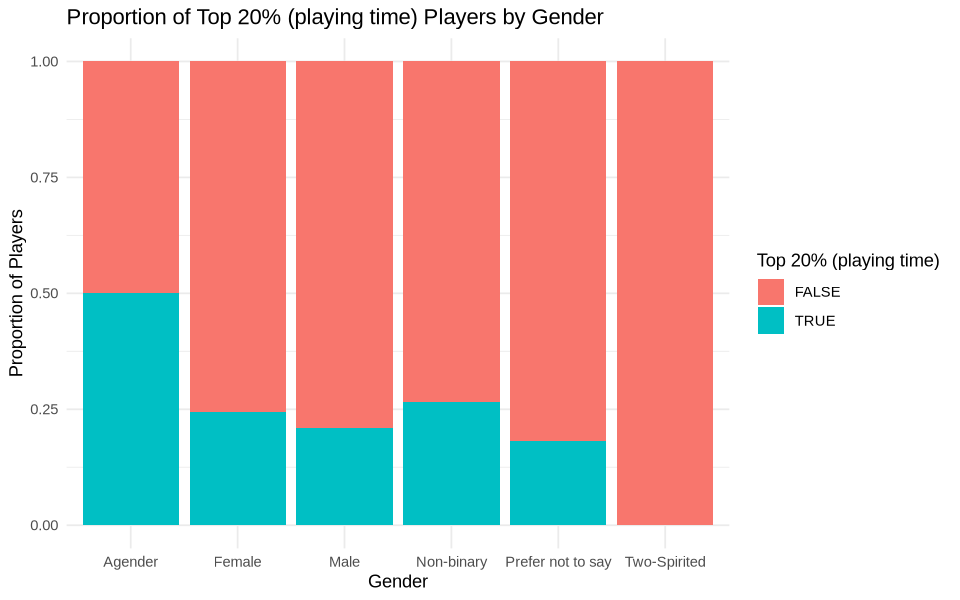

In [78]:
players_0 |> ggplot(aes(x = gender, fill = factor(top_hours))) + geom_bar(position = "fill") + 
labs(title = "Proportion of Top 20% (playing time) Players by Gender",
     x = "Gender",
     y = "Proportion of Players", 
     fill = "Top 20% (playing time)") + theme_minimal()

## (4) Methods and Plan

The KNN Classification method would be suitable to answer our specific question.
KNN is suitable because players are diverse in their gender, experience, and subscribe status. It "clusters" players by finding those with similar characteristics and uses nearest neighbours to predict who is likely to be a top player. It also works well even when the relationships in the data are not simple or linear.

Some assumptions that we have to keep in mind are:
- Variables are properly scaled so that no features "dominates" the distance calculation.